# Gradient calculation with JAX

**Note**: This notebook is designed to run on CPU (no GPU) runtime.

**[GCJ-01]**

Install libraries.

In [1]:
%%bash
curl -sLO https://raw.githubusercontent.com/enakai00/colab_jaxbook/main/requirements.txt
pip install -qr requirements.txt
pip list | grep -E '(jax|flax|optax)'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.6/185.6 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.1/145.1 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 4.1 MB/s eta 0:00:00
flax                          0.6.1
jax                           0.3.25
jaxlib                        0.3.25+cuda11.cudnn805
optax                         0.1.3


**[GCJ-02]**

Import modules.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import jax
from jax import numpy as jnp

plt.rcParams.update({'font.size': 12})

**[GCJ-03]**

Define a visualization function.

In [3]:
def plot3d(x_range, y_range, z_function, grad_function):
    xs = np.linspace(x_range[0], x_range[1], 100)
    ys = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(xs, ys)
    points = np.c_[np.ravel(X), np.ravel(Y)]
    Z = np.array([z_function(x, y) for x, y in points])
    Z = Z.reshape(X.shape)

    fig = plt.figure(figsize=(16, 8))
    subplot = fig.add_subplot(1, 2, 1, projection='3d')
    subplot.plot_surface(X, Y, Z, cmap=plt.cm.Blues_r)
    subplot = fig.add_subplot(1, 2, 2)
    subplot.contourf(X, Y, Z, levels=50,
                     cmap=plt.cm.Blues_r, alpha=0.5)

    xs = np.linspace(x_range[0], x_range[1], 15)
    ys = np.linspace(y_range[0], y_range[1], 15)
    X, Y = np.meshgrid(xs, ys)
    points = np.c_[np.ravel(X), np.ravel(Y)]
    G = [grad_function(x, y) for x, y in points]
    U = np.array([u for u, v in G])
    V = np.array([v for u, v in G])
    U = U.reshape(X.shape)
    V = V.reshape(X.shape)

    subplot.set_aspect('equal')
    subplot.quiver(X, Y, U, V, color='red',
                   scale=16, headlength=6, headwidth=7)
    subplot.set_position([0.5, 0.2, 0.25, 0.50])
    subplot.set_xticks([])
    subplot.set_yticks([])

**[GCJ-04]**

Define a mathematical function $h(x_1, x_2)$ as:

$$h(x_1, x_2) = \frac{1}{4}(x_1^2 + x_2^2)$$

and calculate it's gradient $\nabla h(x_1, x_2)$ with JAX.

In [4]:
@jax.jit
def h(x1, x2):
    z = (1/4) * (x1**2 + x2**2)
    return z

nabla_h = jax.grad(h, (0, 1))
nabla_h_precompiled = jax.jit(nabla_h)

nabla_h_precompiled(1.0, 1.0)

(DeviceArray(0.5, dtype=float32, weak_type=True),
 DeviceArray(0.5, dtype=float32, weak_type=True))

**[GCJ-05]**

Visualize the result.

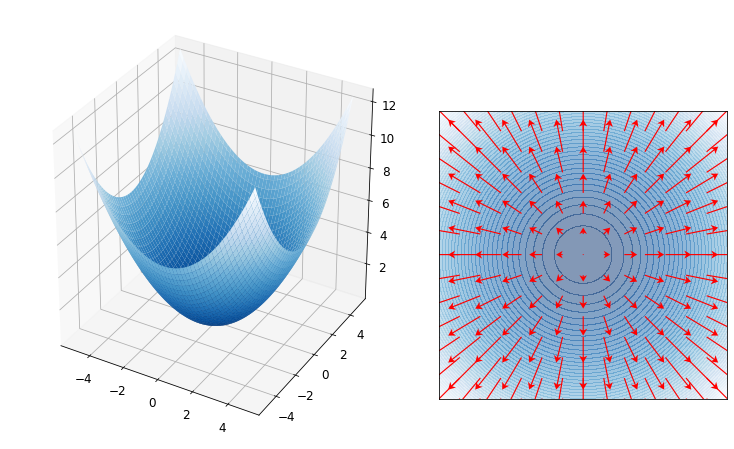

In [5]:
plot3d((-5, 5), (-5, 5), h, nabla_h_precompiled)

**[GCJ-06]**

Define a mathematical function $h(x_1, x_2)$ as:

$$h(x_1, x_2) = 2\sin x_1\cdot\sin x_2$$

and calculate it's gradient $\nabla h(x_1, x_2)$ with JAX. Also, visualize the result.

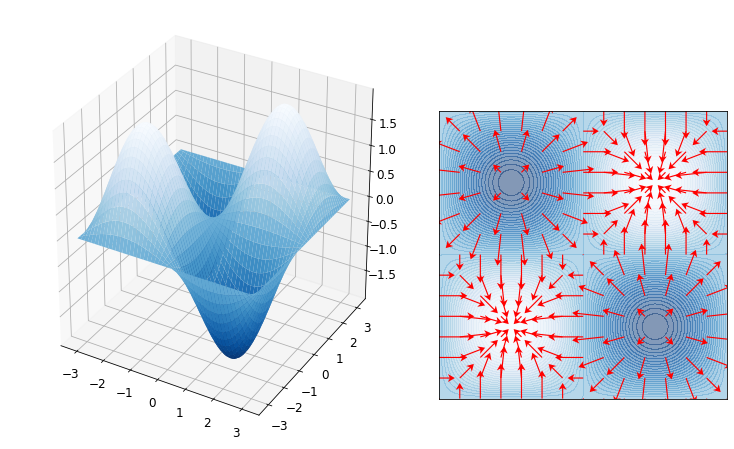

In [6]:
@jax.jit
def h(x1, x2):
    z = 2 * jnp.sin(x1) * jnp.sin(x2)
    return z

nabla_h = jax.jit(jax.grad(h, (0, 1)))
plot3d((-np.pi, np.pi), (-np.pi, np.pi), h, nabla_h)